In [1]:
"""
Team Gamma
COMP262
"""

'\nTeam Gamma\nCOMP262\n'

In [2]:
import pandas as pd
from pathlib import Path

In [3]:
current_dir = Path.cwd()
data_path = current_dir / "Industrial_and_Scientific_5.json"

print("current_dir:", current_dir)
print("data_path:", data_path)

current_dir: /Users/rebecca/Documents/CROUSE/Winter-2025/COMP262-NLP_RS/Project/W25_COMP262_002_TeamGamma
data_path: /Users/rebecca/Documents/CROUSE/Winter-2025/COMP262-NLP_RS/Project/W25_COMP262_002_TeamGamma/Industrial_and_Scientific_5.json


In [4]:
data = pd.read_json(data_path,orient='records',lines=True)

In [5]:
"""
1. Dataset data exploration: List the main finding of the dataset. Be thorough and creative.
For example, look at:
a. Counts, averages
"""

'\n1. Dataset data exploration: List the main finding of the dataset. Be thorough and creative.\nFor example, look at:\na. Counts, averages\n'

In [6]:
data.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"11 27, 2017",A1JB7HFWHRYHT7,B0000223SI,{'Size:': ' 1-(Pack)'},Alex W.,This worked really well for what I used it for...,Couldn't have been happier with it's performance,1511740800,NaN,NaN
1,5,True,"11 4, 2017",A2FCLJG5GV8SD6,B0000223SI,{'Size:': ' 1-(Pack)'},Randall Harris,Fast cutting and good adheasive.,Good paper.,1509753600,NaN,NaN
2,5,False,"10 27, 2017",A3IT9B33NWYQSL,B0000223SI,{'Size:': ' 1-(Pack)'},A. C.,Worked great for my lapping bench. I would li...,Handy!,1509062400,NaN,NaN
3,4,True,"01 13, 2018",AUL5LCV4TT73P,B0000223SK,{'Size:': ' 1-Pack'},TnT,As advertised,As advertised,1515801600,NaN,NaN
4,5,True,"10 7, 2017",A1V3I3L5JKO7TM,B0000223SK,{'Size:': ' 1-Pack'},John Jones,seems like a pretty good value as opposed to b...,seems like a pretty good value as opposed to b...,1507334400,NaN,NaN


In [7]:
data.describe()

,overall,unixReviewTime
count,77071.000000,7.707100e+04
mean,4.524062,1.454857e+09
std,0.949668,4.559407e+07
min,1.000000,1.051402e+09
25%,4.000000,1.427674e+09
50%,5.000000,1.459469e+09
75%,5.000000,1.486944e+09
max,5.000000,1.538093e+09


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77071 entries, 0 to 77070
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         77071 non-null  int64 
 1   verified        77071 non-null  bool  
 2   reviewTime      77071 non-null  object
 3   reviewerID      77071 non-null  object
 4   asin            77071 non-null  object
 5   style           36037 non-null  object
 6   reviewerName    77044 non-null  object
 7   reviewText      77060 non-null  object
 8   summary         77061 non-null  object
 9   unixReviewTime  77071 non-null  int64 
 10  vote            9620 non-null   object
 11  image           1719 non-null   object
dtypes: bool(1), int64(2), object(9)
memory usage: 6.5+ MB


In [9]:
# b. Distribution of the number of reviews across products

In [10]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

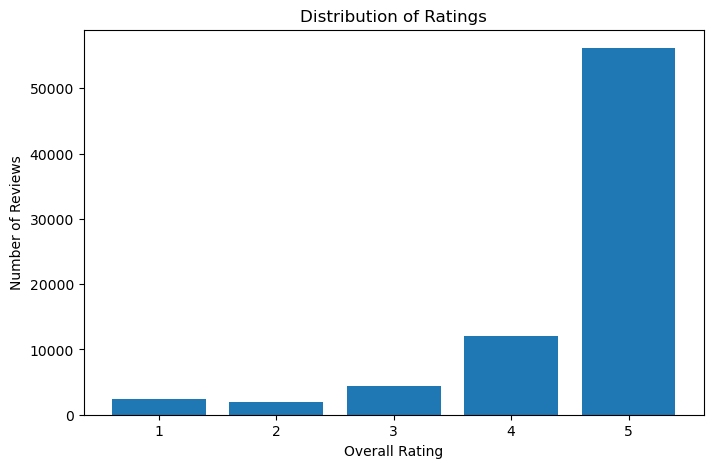

Ratings Distribution:
overall
1     2482
2     1936
3     4442
4    12061
5    56150
Name: count, dtype: int64


In [11]:
rating_counts = data['overall'].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel("Overall Rating")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Ratings")
plt.show()

print("Ratings Distribution:")
print(rating_counts)

In [12]:
num_across_products = data['asin'].value_counts()

In [13]:
num_across_products.head(10)

asin
B0013BKDO8    1229
B00DRALJ28     910
B0001MSC84     650
B000EJUBBU     305
B001766LZO     241
B000ZTEPWU     210
B0002EQU6C     205
B00837ZGRY     204
B00DMI632G     203
B001769IRW     191
Name: count, dtype: int64

In [14]:
len(num_across_products)

5334

In [15]:
max(num_across_products.values)

1229

In [16]:
min(num_across_products.values)

1

In [17]:
x_80 = np.percentile(np.log10(num_across_products.values), 80)

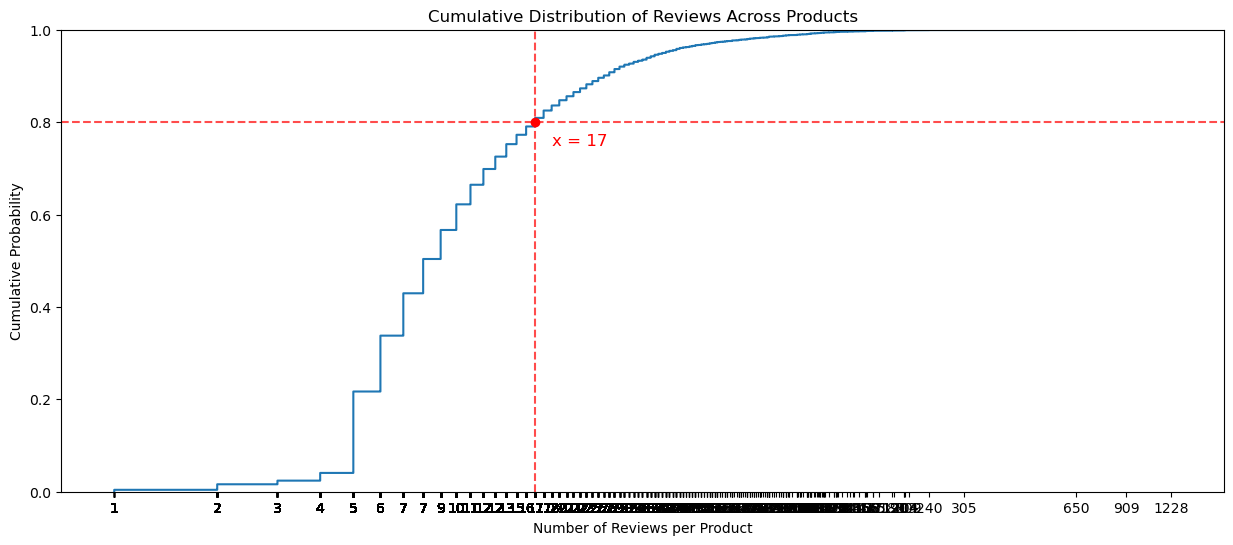

In [18]:
plt.figure(figsize=(15, 6))
sns.ecdfplot(np.log10(num_across_products.values))
plt.axhline(y=0.8, color='r', linestyle='--', alpha=0.7)
plt.axvline(x=x_80, color='r', linestyle='--', alpha=0.7)
plt.scatter([x_80], [0.8], color='red', zorder=3)
plt.text(x_80+0.05, 0.75, f"x = {str(int(10**x_80))}", fontsize=12, color='red')
xticks = np.log10(num_across_products.values)
plt.xticks(xticks, [str(int(10**x)) for x in xticks])
plt.xlabel("Number of Reviews per Product")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution of Reviews Across Products")
plt.show()

In [19]:
# c. Distribution of the number of reviews per product

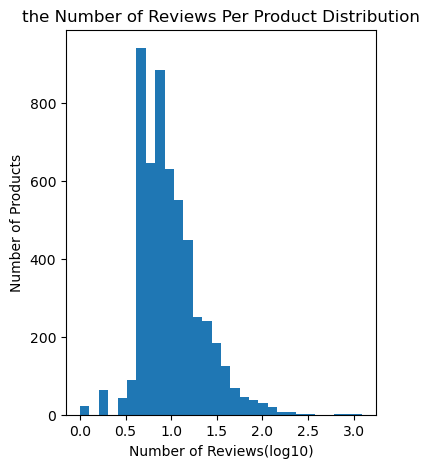

In [20]:
plt.figure(figsize=(4, 5))
plt.hist(np.log10(num_across_products.values), bins=30)
xticks = np.log10(num_across_products.values)
plt.xlabel('Number of Reviews(log10)')
plt.ylabel('Number of Products')
plt.title('the Number of Reviews Per Product Distribution')
plt.show()

In [21]:
# d. Distribution of reviews per user

In [22]:
num_reviews_user = data['reviewerID'].value_counts()
print(num_reviews_user)

reviewerID
A3L1VJMHFWONCB    99
A2W19IAPS7ZSDK    64
A2JZUUAAK3HNHS    61
A3OXHLG6DIBRW8    55
A2J2MQ45S3N25N    47
                  ..
A2FGD486F64BYM     4
A1MRD8YEY0IVCB     4
A3A2555BBGXNMI     4
A15CSHMACOQ70J     3
A36UN90WLZ5X10     2
Name: count, Length: 11041, dtype: int64


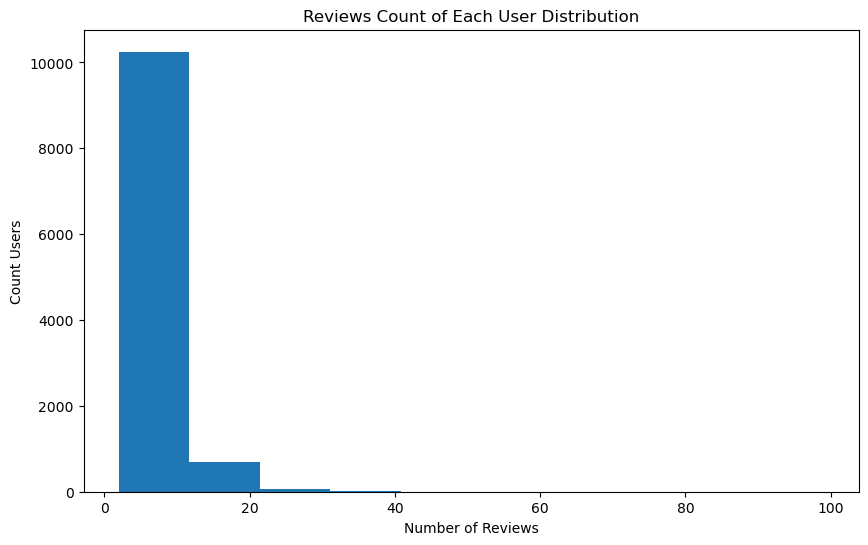

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(num_reviews_user.values)
plt.xlabel('Number of Reviews')
plt.ylabel('Count Users')
plt.title('Reviews Count of Each User Distribution')
plt.show()

In [24]:
x_80_u = np.percentile(num_reviews_user.values, 80)

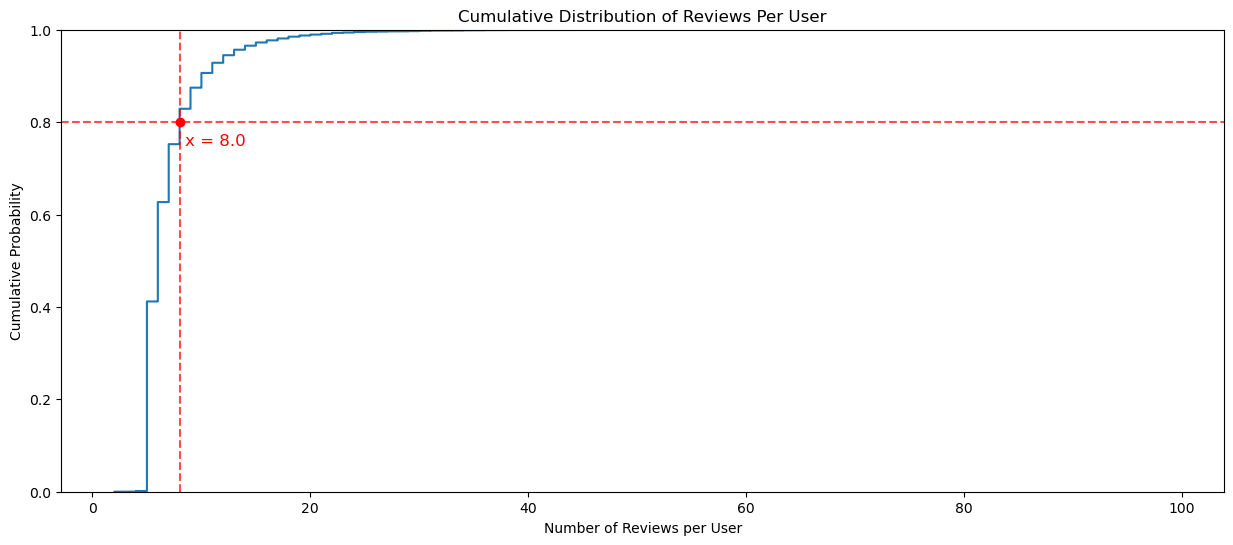

In [25]:
plt.figure(figsize=(15, 6))
sns.ecdfplot(num_reviews_user.values)
plt.axhline(y=0.8, color='r', linestyle='--', alpha=0.7)
plt.axvline(x=x_80_u, color='r', linestyle='--', alpha=0.7)
plt.scatter([x_80_u], [0.8], color='red', zorder=3)
plt.text(x_80_u+0.5, 0.75, f"x = {x_80_u}", fontsize=12, color='red')
plt.xlabel("Number of Reviews per User")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution of Reviews Per User")
plt.show()

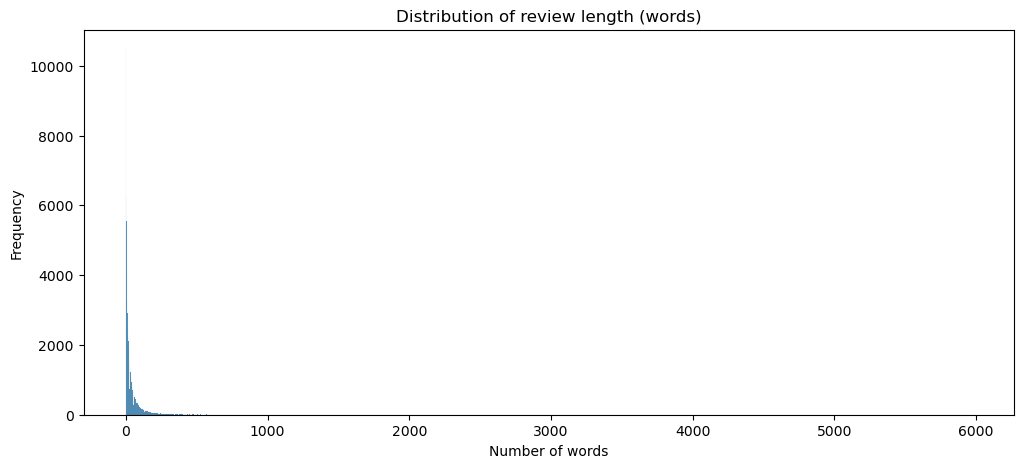

In [26]:
# e. Review lengths and outliers
data['reviewText_length_words'] = data['reviewText'].apply(lambda x: len(str(x).split()))
data['reviewText_length_chars'] = data['reviewText'].apply(lambda x: len(str(x)))

plt.figure(figsize=(12, 5))
sns.histplot(data['reviewText_length_words'])
plt.title('Distribution of review length (words)')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()

In [27]:
Q1 = data['reviewText_length_words'].quantile(0.25)
Q3 = data['reviewText_length_words'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['reviewText_length_words'] < lower_bound) | (data['reviewText_length_words'] > upper_bound)]
print(f'Number of outlier reviews: {len(outliers)}')

Number of outlier reviews: 7330


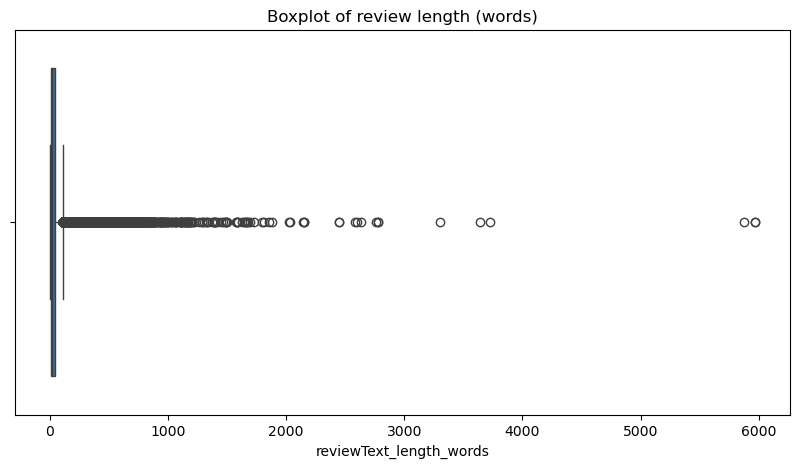

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data['reviewText_length_words'])
plt.title('Boxplot of review length (words)')
plt.show()

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77071 entries, 0 to 77070
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   overall                  77071 non-null  int64 
 1   verified                 77071 non-null  bool  
 2   reviewTime               77071 non-null  object
 3   reviewerID               77071 non-null  object
 4   asin                     77071 non-null  object
 5   style                    36037 non-null  object
 6   reviewerName             77044 non-null  object
 7   reviewText               77060 non-null  object
 8   summary                  77061 non-null  object
 9   unixReviewTime           77071 non-null  int64 
 10  vote                     9620 non-null   object
 11  image                    1719 non-null   object
 12  reviewText_length_words  77071 non-null  int64 
 13  reviewText_length_chars  77071 non-null  int64 
dtypes: bool(1), int64(4), object(9)
memory

In [30]:
nan_rows = data[data['reviewText'].isna()]
nan_indices = nan_rows.index.tolist()
print(len(nan_indices))
print(nan_indices)

11
[603, 14747, 18813, 21401, 35713, 38271, 41986, 41987, 43997, 55969, 56410]


In [31]:
data_without_nan = data.fillna('')

In [32]:
data_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77071 entries, 0 to 77070
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   overall                  77071 non-null  int64 
 1   verified                 77071 non-null  bool  
 2   reviewTime               77071 non-null  object
 3   reviewerID               77071 non-null  object
 4   asin                     77071 non-null  object
 5   style                    77071 non-null  object
 6   reviewerName             77071 non-null  object
 7   reviewText               77071 non-null  object
 8   summary                  77071 non-null  object
 9   unixReviewTime           77071 non-null  int64 
 10  vote                     77071 non-null  object
 11  image                    77071 non-null  object
 12  reviewText_length_words  77071 non-null  int64 
 13  reviewText_length_chars  77071 non-null  int64 
dtypes: bool(1), int64(4), object(9)
memory

In [33]:
review_lenths = []

for review in data_without_nan["reviewText"]:
    len_review = len(review.split())
    review_lenths.append(len_review)

In [34]:
max(review_lenths)

5966

In [35]:
min(review_lenths)

0

In [36]:
# f. Analyze lengths

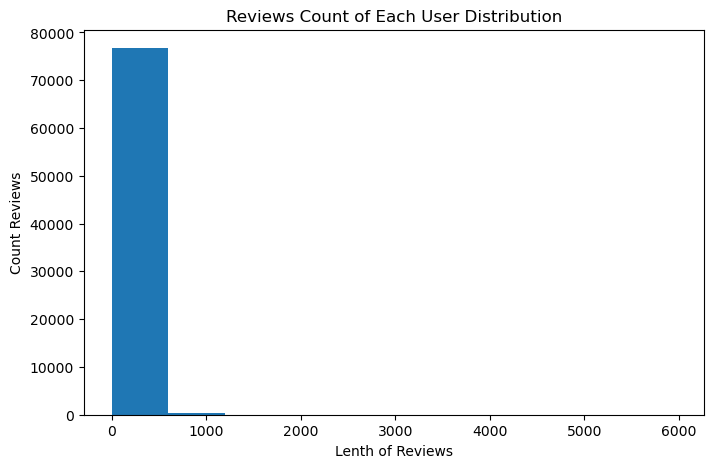

In [37]:
plt.figure(figsize=(8, 5))
plt.hist(review_lenths)
plt.xlabel('Lenth of Reviews')
plt.ylabel('Count Reviews')
plt.title('Reviews Count of Each User Distribution')
plt.show()

In [38]:
np.mean(review_lenths)

44.16502964798692

In [39]:
from collections import Counter

In [40]:
print(Counter(review_lenths))

Counter({2: 6636, 1: 3859, 4: 3314, 3: 2960, 5: 2860, 6: 2679, 7: 2327, 8: 1969, 9: 1760, 10: 1547, 11: 1546, 12: 1375, 20: 1214, 14: 1184, 13: 1179, 15: 1169, 21: 1143, 16: 1073, 22: 1042, 17: 962, 18: 951, 23: 932, 24: 918, 19: 897, 25: 831, 28: 784, 27: 732, 26: 721, 30: 680, 29: 680, 31: 655, 33: 626, 32: 611, 34: 590, 36: 554, 35: 503, 37: 487, 40: 480, 38: 480, 39: 477, 41: 448, 43: 429, 45: 427, 42: 423, 46: 406, 44: 400, 47: 378, 49: 368, 48: 354, 52: 322, 50: 322, 51: 321, 59: 307, 53: 299, 55: 291, 56: 277, 54: 275, 57: 269, 63: 263, 61: 263, 62: 252, 58: 251, 64: 245, 60: 240, 66: 235, 65: 229, 70: 226, 67: 218, 69: 215, 72: 212, 73: 201, 74: 197, 68: 197, 71: 184, 78: 184, 83: 176, 77: 175, 76: 170, 75: 163, 80: 159, 81: 153, 82: 151, 89: 148, 86: 147, 93: 143, 88: 143, 84: 142, 85: 138, 90: 137, 79: 137, 91: 137, 87: 134, 98: 131, 92: 128, 96: 125, 95: 118, 94: 117, 103: 117, 102: 116, 100: 115, 99: 110, 101: 109, 105: 106, 97: 96, 106: 93, 107: 92, 104: 89, 111: 88, 114: 

In [41]:
from scipy import stats

stats.mode(review_lenths)

ModeResult(mode=2, count=6636)

In [42]:
# g. Check for duplicates

In [43]:
data_without_nan['reviewText']

0        This worked really well for what I used it for...
1                         Fast cutting and good adheasive.
2        Worked great for my lapping bench.  I would li...
3                                            As advertised
4        seems like a pretty good value as opposed to b...
                               ...                        
77066    So far it has worked like a champ. Great solut...
77067    Great quality solid state relay. I used this s...
77068    Came with everything needed to install in my M...
77069    Installed a month ago in my Monoprice Maker Se...
77070    This releaves the mothere board of the current...
Name: reviewText, Length: 77071, dtype: object

In [44]:
duplicated_bool = data_without_nan.duplicated(subset='reviewText', keep='first')

In [45]:
Counter(duplicated_bool)

Counter({False: 58331, True: 18740})

In [46]:
duplicated_bool_product_reviews = data_without_nan.duplicated(subset=['reviewText','asin'], keep='first')

In [47]:
Counter(duplicated_bool_product_reviews)

Counter({False: 72432, True: 4639})

In [48]:
duplicated_bool_p_r_ID = data_without_nan.duplicated(subset=['reviewText','asin','reviewerID'], keep='first')

In [49]:
Counter(duplicated_bool_p_r_ID)

Counter({False: 72688, True: 4383})

In [50]:
duplicated_bool_p_r_ID_o = data_without_nan.duplicated(subset=['reviewText','asin','reviewerID','overall'], keep='first')

In [51]:
Counter(duplicated_bool_p_r_ID_o)

Counter({False: 72691, True: 4380})

In [52]:
duplicated_bool_p_r_ID_o_n = data_without_nan.duplicated(subset=['reviewText','asin','reviewerID','overall','reviewerName'], keep='first')

In [53]:
Counter(duplicated_bool_p_r_ID_o_n)

Counter({False: 72691, True: 4380})

In [54]:
duplicated_bool_p_r_ID_o_n_rt = data_without_nan.duplicated(subset=['reviewText','asin','reviewerID','overall','reviewerName','reviewTime'], keep='first')

In [55]:
Counter(duplicated_bool_p_r_ID_o_n_rt)

Counter({False: 72701, True: 4370})

In [56]:
duplicated_bool_p_r_ID_o_n_rt_urt = data_without_nan.duplicated(subset=['reviewText','asin','reviewerID','overall','reviewerName','reviewTime','unixReviewTime'], keep='first')

In [57]:
Counter(duplicated_bool_p_r_ID_o_n_rt_urt)

Counter({False: 72701, True: 4370})

In [58]:
#keep first
data_without_nan_unique = data_without_nan.drop_duplicates(
    subset=['reviewText', 'asin', 'reviewerID', 'overall', 'reviewerName', 'reviewTime', 'unixReviewTime'], 
    keep='first'
)

In [59]:
print(data_without_nan_unique.shape)

(72701, 14)


In [60]:
"""
2. Text basic pre-processing:
a.Label your data based on the value of “rating of the product” i.e. as follows:
i.Ratings 4,5: Positive
ii.Rating 3: Neutral
iii.Ratings 1,2: Negative
"""

'\n2. Text basic pre-processing:\na.Label your data based on the value of “rating of the product” i.e. as follows:\ni.Ratings 4,5: Positive\nii.Rating 3: Neutral\niii.Ratings 1,2: Negative\n'

In [61]:
data_with_label = data_without_nan_unique

In [62]:
label= []

for i,row in data_with_label.iterrows():
    if row['overall'] >= 4.0:
        label = "Positive"
    elif row['overall'] <= 1.0:
        label = "Negative"
    else:
        label = "Neutral"
        
data_with_label['label'] = label

/var/folders/60/83kzkx2x4hs5zc8lx2tyc8lw0000gn/T/ipykernel_97895/2880495742.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_label['label'] = label


In [63]:
data_with_label.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,reviewText_length_words,reviewText_length_chars,label
0,5,True,"11 27, 2017",A1JB7HFWHRYHT7,B0000223SI,{'Size:': ' 1-(Pack)'},Alex W.,This worked really well for what I used it for...,Couldn't have been happier with it's performance,1511740800,,,71,393,Positive
1,5,True,"11 4, 2017",A2FCLJG5GV8SD6,B0000223SI,{'Size:': ' 1-(Pack)'},Randall Harris,Fast cutting and good adheasive.,Good paper.,1509753600,,,5,32,Positive
2,5,False,"10 27, 2017",A3IT9B33NWYQSL,B0000223SI,{'Size:': ' 1-(Pack)'},A. C.,Worked great for my lapping bench. I would li...,Handy!,1509062400,,,46,243,Positive
3,4,True,"01 13, 2018",AUL5LCV4TT73P,B0000223SK,{'Size:': ' 1-Pack'},TnT,As advertised,As advertised,1515801600,,,2,13,Positive
4,5,True,"10 7, 2017",A1V3I3L5JKO7TM,B0000223SK,{'Size:': ' 1-Pack'},John Jones,seems like a pretty good value as opposed to b...,seems like a pretty good value as opposed to b...,1507334400,,,19,90,Positive


In [64]:
# Chose the appropriate columns for your sentiment analyzer. (Give this some thought) and mention in your report why you chose each column.

In [65]:
data_for_sentiment_analyzer = data_with_label[['reviewText','summary','label']]

In [66]:
data_for_sentiment_analyzer.head()

,reviewText,summary,label
0,This worked really well for what I used it for...,Couldn't have been happier with it's performance,Positive
1,Fast cutting and good adheasive.,Good paper.,Positive
2,Worked great for my lapping bench. I would li...,Handy!,Positive
3,As advertised,As advertised,Positive
4,seems like a pretty good value as opposed to b...,seems like a pretty good value as opposed to b...,Positive


In [67]:
#c.Check for outliers

In [68]:
data_for_sentiment_analyzer['reviewText_length_words'] = data_for_sentiment_analyzer['reviewText'].apply(lambda x: len(str(x).split()))

/var/folders/60/83kzkx2x4hs5zc8lx2tyc8lw0000gn/T/ipykernel_97895/2208887511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_sentiment_analyzer['reviewText_length_words'] = data_for_sentiment_analyzer['reviewText'].apply(lambda x: len(str(x).split()))


In [69]:
data_for_sentiment_analyzer['reviewText_length_words']

0        71
1         5
2        46
3         2
4        19
         ..
77066    15
77067    29
77068    33
77069    31
77070    16
Name: reviewText_length_words, Length: 72701, dtype: int64

In [70]:
Q1 = data_for_sentiment_analyzer['reviewText_length_words'].quantile(0.25)
Q3 = data_for_sentiment_analyzer['reviewText_length_words'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data_for_sentiment_analyzer[(data_for_sentiment_analyzer['reviewText_length_words'] < lower_bound) | (data_for_sentiment_analyzer['reviewText_length_words'] > upper_bound)]
print(f'Number of outlier reviews: {len(outliers)}')

Number of outlier reviews: 7008


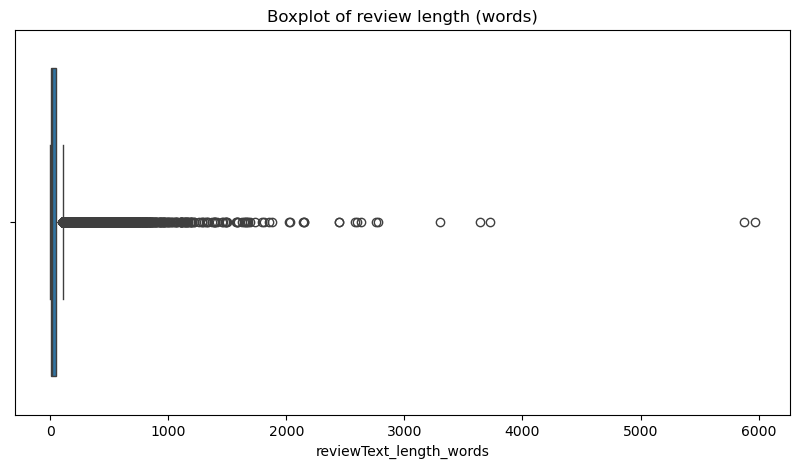

In [71]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data_for_sentiment_analyzer['reviewText_length_words'])
plt.title('Boxplot of review length (words)')
plt.show()

In [72]:
#3. Study the below three Lexicons packages and choose two for model building justify why you chose them:
# VADR + TextBlob

In [73]:
#VADR
#install VADR
#conda install conda-forge::vadersentiment
#or
#pip install vaderSentiment

In [74]:
#4. Pre-process your text as needed, justify each pre-processing step for each model you chose. 
# (Note: take into account the findings of step #3 above)

In [75]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#from vaderSentiment import SentimentIntensityAnalyzer

In [79]:
data_for_sentiment_analyzer['full_text'] = data_for_sentiment_analyzer['summary']+" "+data_for_sentiment_analyzer['reviewText']

/var/folders/60/83kzkx2x4hs5zc8lx2tyc8lw0000gn/T/ipykernel_97895/215435576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_sentiment_analyzer['full_text'] = data_for_sentiment_analyzer['summary']+" "+data_for_sentiment_analyzer['reviewText']


In [82]:
import re
def clean_text(text):
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b', '', text)
    text = re.sub(r'http[s]?://\S+|www\.\S+', '', text)
    text = re.sub(r'[@#$%&*]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [83]:
data_for_sentiment_analyzer['full_clean'] = data_for_sentiment_analyzer['full_text'].apply(clean_text)

/var/folders/60/83kzkx2x4hs5zc8lx2tyc8lw0000gn/T/ipykernel_97895/4202241456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_sentiment_analyzer['full_clean'] = data_for_sentiment_analyzer['full_text'].apply(clean_text)


In [84]:
data_for_sentiment_analyzer.head()

,reviewText,summary,label,reviewText_length_words,full_text,full_clean
0,This worked really well for what I used it for...,Couldn't have been happier with it's performance,Positive,71,Couldn't have been happier with it's performan...,Couldn't have been happier with it's performan...
1,Fast cutting and good adheasive.,Good paper.,Positive,5,Good paper. Fast cutting and good adheasive.,Good paper. Fast cutting and good adheasive.
2,Worked great for my lapping bench. I would li...,Handy!,Positive,46,Handy! Worked great for my lapping bench. I w...,Handy! Worked great for my lapping bench. I wo...
3,As advertised,As advertised,Positive,2,As advertised As advertised,As advertised As advertised
4,seems like a pretty good value as opposed to b...,seems like a pretty good value as opposed to b...,Positive,19,seems like a pretty good value as opposed to b...,seems like a pretty good value as opposed to b...


In [85]:
data_for_sentiment_analyzer = data_for_sentiment_analyzer[['label', 'full_clean']]

In [86]:
data_for_sentiment_analyzer.head()

,label,full_clean
0,Positive,Couldn't have been happier with it's performan...
1,Positive,Good paper. Fast cutting and good adheasive.
2,Positive,Handy! Worked great for my lapping bench. I wo...
3,Positive,As advertised As advertised
4,Positive,seems like a pretty good value as opposed to b...


In [87]:
#5. Randomly select 1000 reviews from your dataset.

In [88]:
sampled_df = data_for_sentiment_analyzer.sample(n=1000, random_state=42)

In [89]:
sampled_df.head()

,label,full_clean
6057,Positive,Good Wife loves it for her polymer clay jewelr...
43836,Positive,Good choice for monitoring humidity inside a s...
24730,Positive,"30 Bearing 608ZZ 8x22x7 Good quality, very fas..."
62359,Positive,Use the red range to crimp smaller size wire i...
56222,Positive,Fabulous! This is the greatest little gizmo fo...


In [90]:
#6. Modeling (Sentiment Analysis) Lexicon approach:
#a.Build two sentiment analysis models using the labeled pre-processed data for both the lexicons packages the team selected in step #3 above.

In [ ]:
#7. Validate the results of both models and provide a comparision table.